# Modeling and Simulation in Python

Copyright 2018 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Modeling tree growth

In [2]:
years = [2, 3, 4, 5, 6, 8, 10, 15, 20, 25, 30,
         35, 40, 45, 50, 55, 60, 65, 70]

[2, 3, 4, 5, 6, 8, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]

In [3]:
site65 = TimeSeries([1.4, 1.56, 2.01, 2.76, 3.79, 6.64, 10.44, 
                    23.26, 37.65, 51.66, 65.00, 77.50, 89.07, 
                    99.66, 109.28, 117.96, 125.74, 132.68, 138.84],
                    index=years)

,values
2,1.40
3,1.56
4,2.01
5,2.76
6,3.79
8,6.64
10,10.44
15,23.26
20,37.65
25,51.66


In [4]:
site45 = TimeSeries([1.4, 1.49, 1.75, 2.18, 2.78, 4.45, 6.74,
                    14.86, 25.39, 35.60, 45.00, 53.65, 61.60,
                    68.92, 75.66, 81.85, 87.56, 92.8, 97.63],
                    index=years)

,values
2,1.40
3,1.49
4,1.75
5,2.18
6,2.78
8,4.45
10,6.74
15,14.86
20,25.39
25,35.60


In [5]:
data = site65;

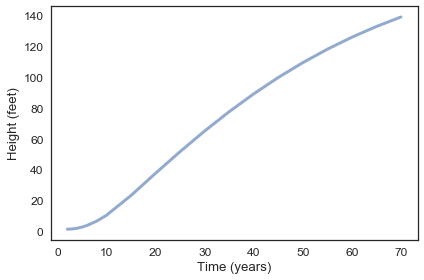

In [6]:
plot(data)
decorate(xlabel='Time (years)',
         ylabel='Height (feet)')

In [7]:
alpha = 7
dim = 3

t_0 = get_first_label(data)
t_end = get_last_label(data)

h_0 = get_first_value(data)
m_0 = h_0**dim

system = System(alpha=alpha, dim=dim, 
                m_0=m_0, t_0=t_0, t_end=t_end)

,values
alpha,7.000
dim,3.000
m_0,2.744
t_0,2.000
t_end,70.000


In [8]:
def update(mass, t, system):
    """
    """
    height = mass**(1/system.dim)
    area = height**2
    growth = system.alpha * area
    return mass + growth

In [9]:
update(m_0, t_0, system)

16.464

In [10]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.m_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

In [11]:
results = run_simulation(system, update)
results.tail()

66    2.773346e+06
67    2.911523e+06
68    3.054252e+06
69    3.201608e+06
70    3.353666e+06
dtype: float64

In [12]:
model = results**(1.0/system.dim)
model.tail()

66    140.497321
67    142.792941
68    145.089152
69    147.385935
70    149.683273
dtype: float64

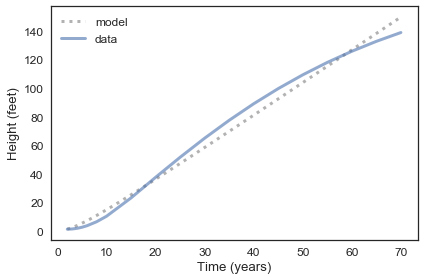

In [13]:
def plot_results(model, data):
    plot(model, ':', label='model', color='gray')
    plot(data, label='data')
    decorate(xlabel='Time (years)',
             ylabel='Height (feet)')
    
plot_results(model, data)

In [14]:
errors = model - data
errors.dropna()

2      0.000000
3      0.983969
4      1.942915
5      2.792070
6      3.496882
8      4.387116
10     4.557437
15     2.194275
20    -1.346851
25    -4.304519
30    -6.468590
35    -7.709926
40    -7.962119
45    -7.189989
50    -5.413433
55    -2.669382
60     0.997125
65     5.522310
70    10.843273
dtype: float64

In [15]:
np.mean(np.abs(model-data))

4.251693738559468

### Model 2

In [16]:
alpha = 2.1
dim = 2.55

params = [alpha, dim]

[2.1, 2.55]

In [17]:
def make_system(params, data):
    alpha, dim = params
    
    t_0 = get_first_label(data)
    t_end = get_last_label(data)

    h_0 = get_first_value(data)
    m_0 = h_0**dim

    return System(alpha=alpha, dim=dim, 
                  m_0=m_0, t_0=t_0, t_end=t_end)

In [18]:
system = make_system(params, data)

,values
alpha,2.100000
dim,2.550000
m_0,2.358449
t_0,2.000000
t_end,70.000000


In [19]:
def error_func(params, data):
    print(params)
    system = make_system(params, data)
    results = run_simulation(system, update)
    model = results**(1/system.dim)
    return (model - data).dropna()

In [20]:
error_func(params, data)

[2.1, 2.55]


2       0.000000
3       0.520265
4       0.924127
5       1.209847
6       1.403224
8       1.577563
10      1.585171
15      1.736457
20      5.207651
25     13.851022
30     27.848984
35     47.269297
40     72.108463
45    102.331817
50    137.852705
55    178.571495
60    224.384644
65    275.173881
70    330.825519
dtype: float64

In [21]:
best_params, details = fit_leastsq(error_func, params, data)
details

[2.1  2.55]
[2.1  2.55]
[2.1  2.55]
[2.10000003 2.55      ]
[2.1        2.55000004]
[2.76604294 2.69780009]
[2.76604298 2.69780009]
[2.76604294 2.69780013]
[5.0234949 2.9440564]
[5.02349498 2.9440564 ]
[5.0234949  2.94405644]
[9.69247777 3.14912443]
[6.42976889 2.98669579]
[6.42976898 2.98669579]
[6.42976889 2.98669583]
[9.20408909 3.08405647]
[7.42500622 3.01638898]
[7.42500633 3.01638898]
[7.42500622 3.01638903]
[9.40811547 3.07827856]
[9.40811561 3.07827856]
[9.40811547 3.0782786 ]
[10.43113693  3.09663673]
[10.43113709  3.09663673]
[10.43113693  3.09663677]
[11.53820548  3.12075424]
[11.53820565  3.12075424]
[11.53820548  3.12075429]
[11.44351116  3.11744569]
[11.44351133  3.11744569]
[11.44351116  3.11744574]
[11.46707325  3.11793953]
[11.46707342  3.11793953]
[11.46707325  3.11793958]
[11.4638141   3.11787055]
[11.46381427  3.11787055]
[11.4638141   3.11787059]
[11.46427485  3.11788022]


,values
fvec,"[0.0, 1.2594308979816495, 2.5892016637202735, ..."
nfev,36
fjac,"[[-1211.618772929504, -0.0007452849248626251, ..."
ipvt,"[2, 1]"
qtf,"[5.666535674642148e-05, 0.0008739214002897455]"
cov_x,"[[0.27795796978909076, 0.0058064238267422465],..."
mesg,Both actual and predicted relative reductions ...
ier,1


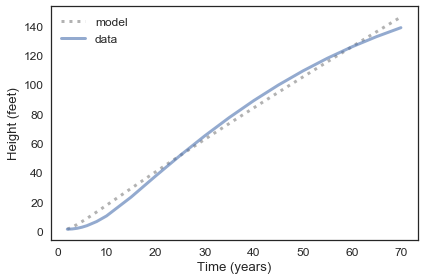

In [22]:
system = make_system(best_params, data)
results = run_simulation(system, update)
model = results**(1/system.dim)

plot_results(model, data)

In [23]:
np.mean(np.abs(model-data))

3.6184893758088164

### Model 3

In [24]:
alpha = 2.1
dim = 2.55
K = 155

params = [alpha, dim, K]

[2.1, 2.55, 155]

In [25]:
def make_system(params, data):
    alpha, dim, K = params
    
    t_0 = get_first_label(data)
    t_end = get_last_label(data)

    h_0 = get_first_value(data)
    m_0 = h_0**dim

    return System(alpha=alpha, dim=dim, K=K, 
                  m_0=m_0, t_0=t_0, t_end=t_end)

In [26]:
system = make_system(params, data)

,values
alpha,2.100000
dim,2.550000
K,155.000000
m_0,2.358449
t_0,2.000000
t_end,70.000000


In [27]:
def update3(mass, t, system):
    height = mass**(1/system.dim)
    area = height**2
    growth = system.alpha * area * (1 - height/system.K)
    return mass + growth

In [34]:
update3(m_0, t_0, system)

8.481937435396363

In [29]:
def error_func(params, data):
    print(params)
    system = make_system(params, data)
    results = run_simulation(system, update3)
    model = results**(1/system.dim)
    return (model - data).dropna()

In [30]:
error_func(params, data)

[2.1, 2.55, 155]


2     0.000000
3     0.515573
4     0.909335
5     1.176394
6     1.338516
8     1.392075
10    1.158812
15   -0.239973
20   -0.623298
25    0.630508
30    2.621473
35    4.618652
40    6.139324
45    6.953825
50    6.994985
55    6.321993
60    5.065493
65    3.369935
70    1.382605
dtype: float64

In [31]:
best_params, details = fit_leastsq(error_func, params, data)
details

[  2.1    2.55 155.  ]
[  2.1    2.55 155.  ]
[  2.1    2.55 155.  ]
[  2.10000003   2.55       155.        ]
[  2.1          2.55000004 155.        ]
[  2.1          2.55       155.00000231]
[  2.61089401   2.63723484 161.3493544 ]
[  2.61089405   2.63723484 161.3493544 ]
[  2.61089401   2.63723488 161.3493544 ]
[  2.61089401   2.63723484 161.3493568 ]
[  2.69877322   2.64197001 165.13866789]
[  2.69877326   2.64197001 165.13866789]
[  2.69877322   2.64197005 165.13866789]
[  2.69877322   2.64197001 165.13867035]
[  2.69570847   2.64149678 165.08113183]
[  2.69570851   2.64149678 165.08113183]
[  2.69570847   2.64149682 165.08113183]
[  2.69570847   2.64149678 165.08113429]
[  2.69596158   2.6415232  165.08398548]
[  2.69596162   2.6415232  165.08398548]
[  2.69596158   2.64152324 165.08398548]
[  2.69596158   2.6415232  165.08398794]
[  2.69593977   2.6415208  165.08364714]


,values
fvec,"[0.0, 0.602656661820363, 1.105132250183773, 1...."
nfev,21
fjac,"[[-935.0842026692267, -0.0005819475927568609, ..."
ipvt,"[2, 1, 3]"
qtf,"[-4.297627489824318e-06, -7.412311239207714e-0..."
cov_x,"[[0.034807143501353624, 0.0038658334352350216,..."
mesg,Both actual and predicted relative reductions ...
ier,1


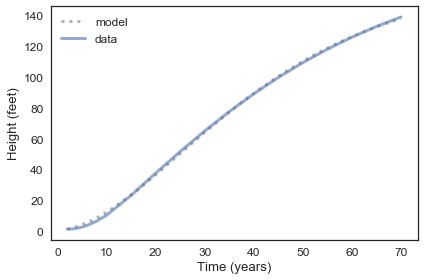

In [32]:
system = make_system(best_params, data)
results = run_simulation(system, update3)
model = results**(1/system.dim)

plot_results(model, data)

In [33]:
np.mean(np.abs(model-data))

0.8895321155837896